In [ ]:
from google.colab import files
uploaded = files.upload()


Saving MSFT.csv to MSFT (1).csv


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


In [ ]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
df.head()


,date,open,high,low,close,volume
0,1986-03-13,0.0548,0.0628,0.0548,0.0602,1031788800
1,1986-03-14,0.0602,0.0634,0.0602,0.0623,308160000
2,1986-03-17,0.0623,0.0639,0.0623,0.0634,133171200
3,1986-03-18,0.0634,0.0639,0.0612,0.0618,67766400
4,1986-03-19,0.0618,0.0623,0.0602,0.0607,47894400


In [ ]:
import pandas as pd

# Assuming your 'date' column is in a format that can be parsed as datetime
df['date'] = pd.to_datetime(df['date'])

# Filter the DataFrame to include data from 2009 onwards
df = df[df['date'].dt.year >= 2009]

# Reset the index if needed
df = df.reset_index(drop=True)

# Now, df will contain only data from 2009 and later

In [ ]:
df.head()

,date,open,high,low,close,volume
0,2009-01-02,14.4152,15.0552,14.2951,15.0036,50084000
1,2009-01-05,14.9076,15.2545,14.8043,15.1438,61475200
2,2009-01-06,15.3135,15.4980,15.2102,15.3209,58083400
3,2009-01-07,14.9002,14.9740,14.3763,14.3984,72709900
4,2009-01-08,14.4870,14.9002,14.4279,14.8486,70255400


In [ ]:
#Step 3: Preprocess the Data
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Ensure date is sorted (just in case)
df = df.sort_values('date')

# Use only 'close' price for LSTM
close_data = df[['close']].values

# Normalize data between 0 and 1
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(scaled_close, sequence_length)

# Reshape for LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 30, 200)        │        81,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,101 (789.46 KB)

 Trainable params: 202,101 (789.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 37s 341ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 3.2217e-04 - val_loss: 6.2319e-04
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - loss: 2.6461e-04 - val_loss: 0.0013
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - loss: 2.2932e-04 - val_loss: 4.7136e-04
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 3.0601e-04 - val_loss: 4.3829e-04
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 2.5517e-04 - val_loss: 5.5583e-04
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 1.9431e-04 - val_loss: 4.5635e-04
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - loss: 2.8366e-04 - val_loss: 0.0023
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 206ms/step - loss: 2.9117e-04 - val_loss: 4.7093e-04
Epoch 10/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - loss: 1.9197e-04 - val_loss: 5.8880e-04
Epoch 11/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - loss: 1.8611e

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


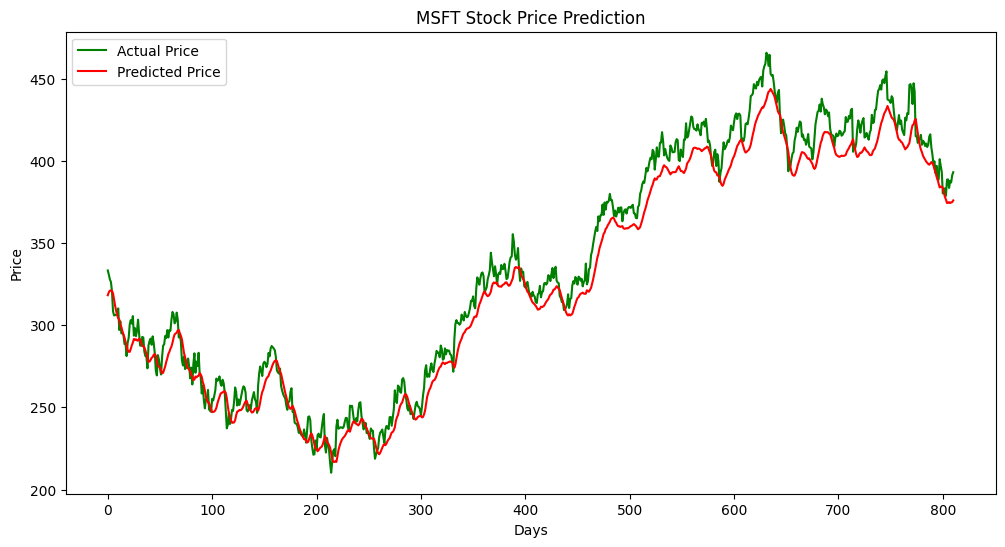

In [ ]:
import matplotlib.pyplot as plt

# Predict

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, color='green', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


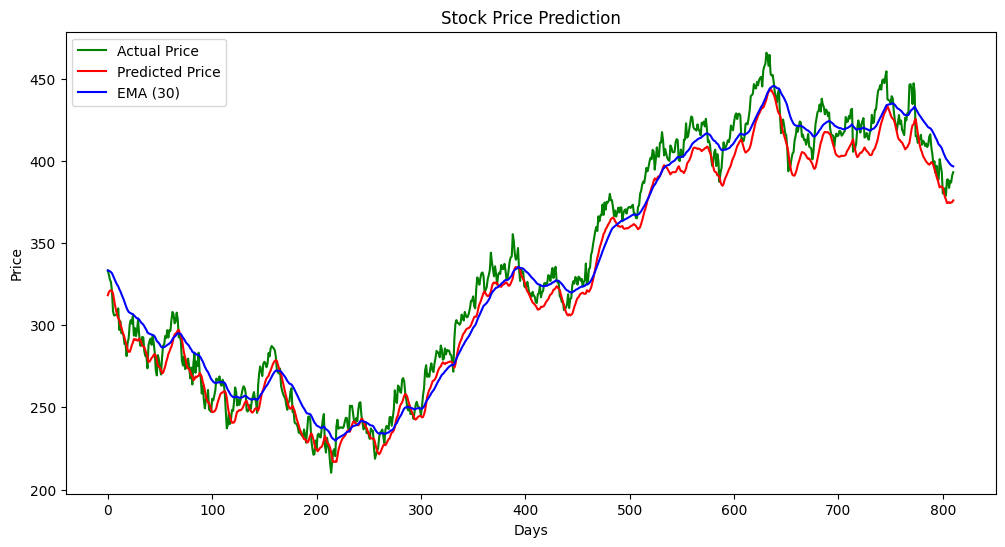

In [ ]:
# ... (your existing code) ...

# 4. Prediction and Plotting
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate EMA for predicted prices
predicted_ema = pd.Series(true_prices.flatten()).ewm(span=30, adjust=False).mean()

# Plot predicted prices, true prices, and EMA (without date alignment)
plt.figure(figsize=(12, 6))
plt.plot(true_prices, label="Actual Price", color='green')
plt.plot(predicted_prices, label="Predicted Price", color='red')
plt.plot(predicted_ema, label="EMA (30)", color='blue')  # Plot EMA without date alignment
plt.title('Stock Price Prediction')
plt.xlabel('Days')  # Use 'Days' instead of 'Date'
plt.ylabel('Price')
plt.legend()
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


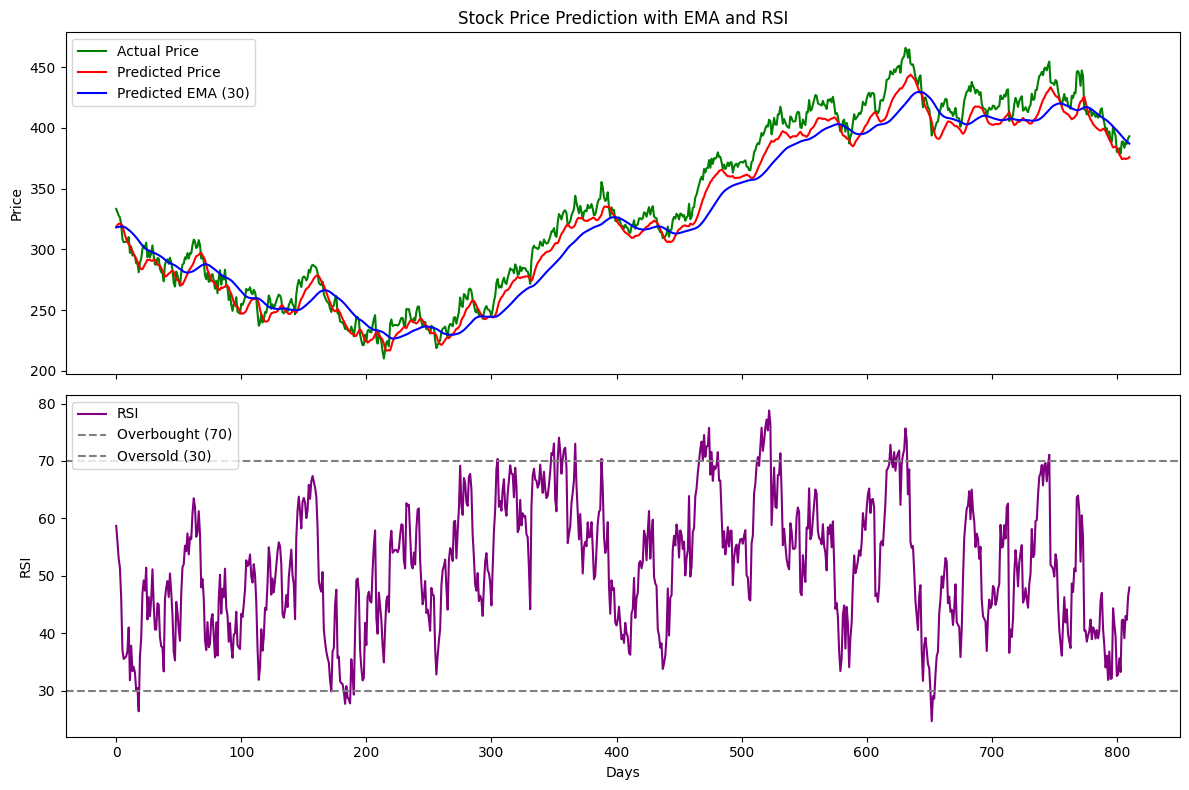

In [ ]:
# ... (your existing code for data loading, preprocessing, and model training) ...

# 4. Prediction and Plotting
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate EMA for predicted prices
predicted_ema = pd.Series(predicted_prices.flatten()).ewm(span=30, adjust=False).mean()

# Calculate RSI using the 'ta' library
!pip install ta  # Install the 'ta' library if you haven't already
import ta

df['RSI'] = ta.momentum.RSIIndicator(close=df['close'], window=14).rsi()

# Get RSI values for the test set
rsi_values = df['RSI'].iloc[-len(true_prices):].values

# Create a figure and axes for the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot actual and predicted prices with EMA on the first subplot (ax1)
ax1.plot(true_prices, label="Actual Price", color='green')
ax1.plot(predicted_prices, label="Predicted Price", color='red')
ax1.plot(predicted_ema, label="Predicted EMA (30)", color='blue')
ax1.set_title('Stock Price Prediction with EMA and RSI')
ax1.set_ylabel('Price')
ax1.legend()

# Plot RSI on the second subplot (ax2)
ax2.plot(rsi_values, label="RSI", color='purple')
ax2.axhline(y=70, color='gray', linestyle='--', label="Overbought (70)")
ax2.axhline(y=30, color='gray', linestyle='--', label="Oversold (30)")
ax2.set_xlabel('Days')
ax2.set_ylabel('RSI')
ax2.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


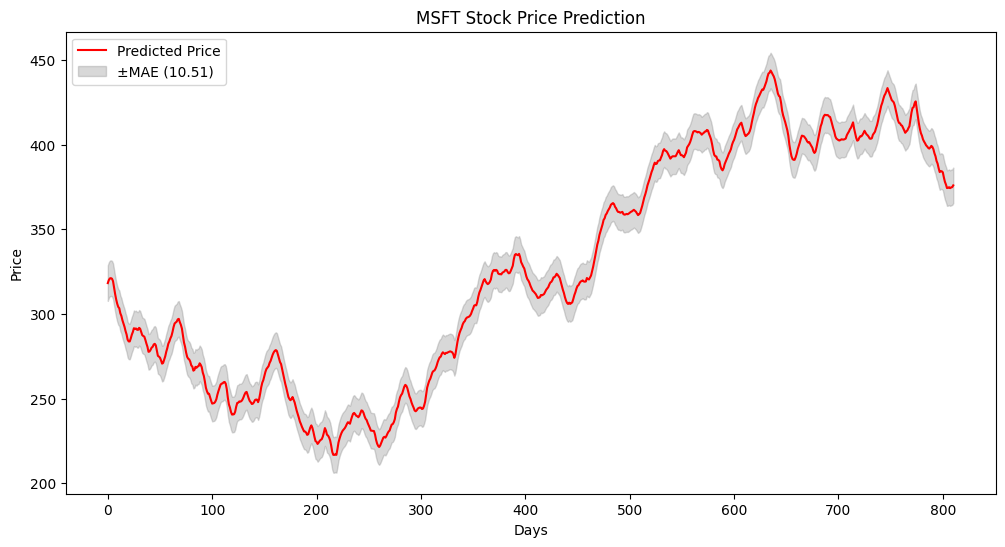

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# ... (your code for prediction and calculation of MAE) ...

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE
mae = mean_absolute_error(y_test_scaled, predictions)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(predictions, color='red', label='Predicted Price')

# Add confidence band (MAE)
plt.fill_between(range(len(predictions)), predictions.flatten() - mae, predictions.flatten() + mae,
                 color='gray', alpha=0.3, label=f'±MAE ({mae:.2f})')

plt.title('MSFT Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


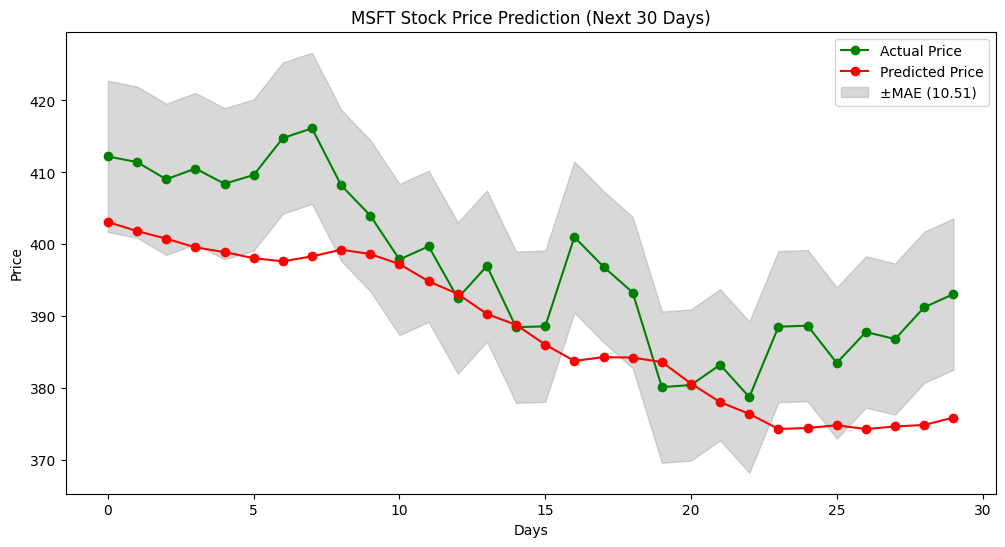

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# ... (your code for prediction and calculation of MAE) ...

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE
mae = mean_absolute_error(y_test_scaled, predictions)

# Focus on the last 30 days (or any desired range)
num_days_to_show = 30
start_index = len(predictions) - num_days_to_show

# Plot with dot points and no line interpolation
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled[start_index:], color='green', label='Actual Price', marker='o', linestyle='-')
plt.plot(predictions[start_index:], color='red', label='Predicted Price', marker='o', linestyle='-')

# Add confidence band (MAE) around the ACTUAL price
plt.fill_between(range(num_days_to_show), y_test_scaled[start_index:].flatten() - mae, y_test_scaled[start_index:].flatten() + mae,
                 color='gray', alpha=0.3, label=f'±MAE ({mae:.2f})')

plt.title('MSFT Stock Price Prediction (Next 30 Days)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)

print(f'MSE: {mse:.4f}, MAE: {mae:.4f}')


MSE: 156.8197, MAE: 10.5070


In [ ]:
# Predict on test set
predictions = model.predict(X_test)

# Inverse transform the predictions and y_test to original price scale
predicted_prices = scaler.inverse_transform(predictions)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [ ]:
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


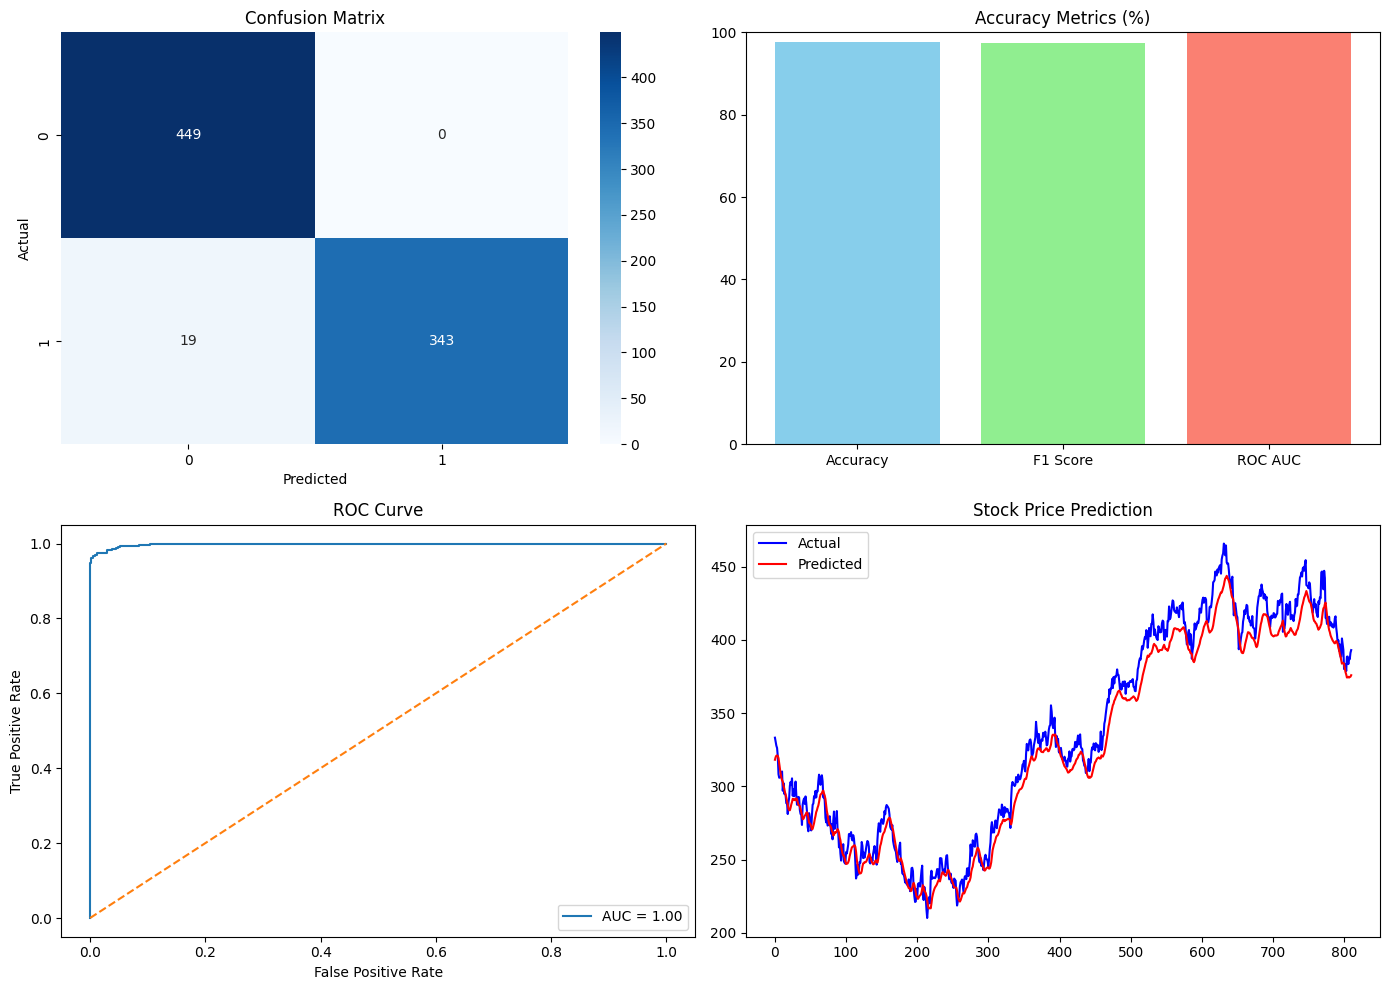

Accuracy: 97.66%
F1 Score: 97.30%
ROC AUC Score: 99.86%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
# Binarize for classification metrics (using mean price as threshold)
threshold = np.mean(true_prices)
binary_true = (true_prices > threshold).astype(int)
binary_pred = (predicted_prices > threshold).astype(int)

# Metrics
acc = accuracy_score(binary_true, binary_pred)
f1 = f1_score(binary_true, binary_pred)
roc_auc = roc_auc_score(binary_true, predicted_prices)

# Confusion matrix
cm = confusion_matrix(binary_true, binary_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(binary_true, predicted_prices)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

# Accuracy/F1 Bar
axes[0, 1].bar(["Accuracy", "F1 Score", "ROC AUC"], [acc * 100, f1 * 100, roc_auc * 100],
               color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 1].set_ylim(0, 100)
axes[0, 1].set_title("Accuracy Metrics (%)")

# ROC Curve
axes[1, 0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axes[1, 0].plot([0, 1], [0, 1], linestyle='--')
axes[1, 0].set_title("ROC Curve")
axes[1, 0].set_xlabel("False Positive Rate")
axes[1, 0].set_ylabel("True Positive Rate")
axes[1, 0].legend()

# Prediction vs Actual Prices
axes[1, 1].plot(true_prices, label="Actual", color='blue')
axes[1, 1].plot(predicted_prices, label="Predicted", color='red')
axes[1, 1].set_title("Stock Price Prediction")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print metrics
print(f"Accuracy: {acc * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"ROC AUC Score: {roc_auc * 100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Test Accuracy (Last 30 Days): 100.00%
MAE (Last 30 Days): 9.00


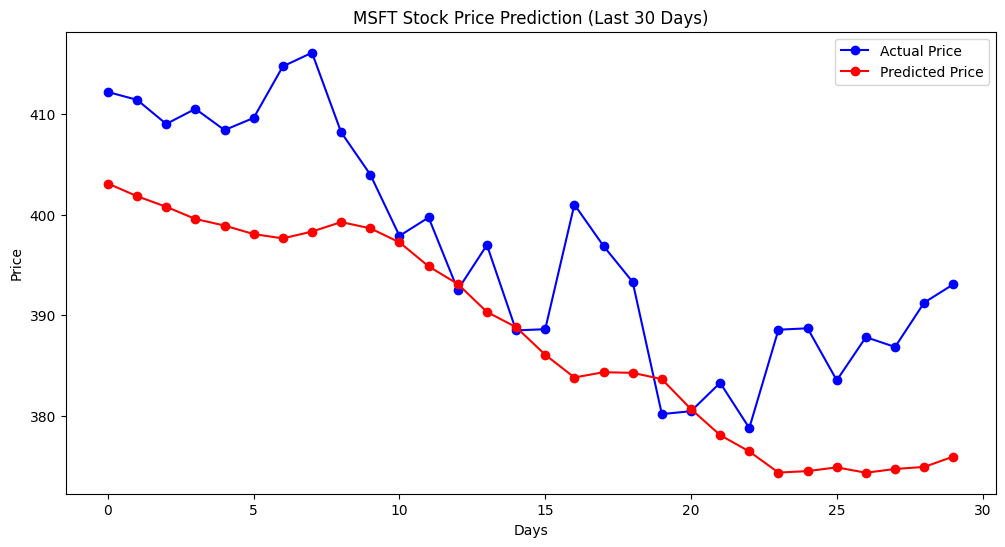

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code for model training, data preprocessing, etc.) ...

# Get predictions for the test set
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Focus on the last 30 days
num_days = 30
start_index = len(predicted_prices) - num_days

# Binarize for classification metrics (using mean price as threshold)
threshold = np.mean(true_prices)
binary_true = (true_prices[start_index:] > threshold).astype(int)
binary_pred = (predicted_prices[start_index:] > threshold).astype(int)

# Calculate accuracy for the last 30 days
accuracy_30_days = accuracy_score(binary_true, binary_pred)

# Calculate MAE for the last 30 days
mae_30_days = mean_absolute_error(true_prices[start_index:], predicted_prices[start_index:])

# Print the accuracy
print(f"Test Accuracy (Last 30 Days): {accuracy_30_days * 100:.2f}%")
print(f"MAE (Last 30 Days): {mae_30_days:.2f}")

# Plot predictions vs actual prices for the last 30 days
plt.figure(figsize=(12, 6))
plt.plot(true_prices[start_index:], label="Actual Price", color='blue', marker='o', linestyle='-')
plt.plot(predicted_prices[start_index:], label="Predicted Price", color='red', marker='o', linestyle='-')
plt.title('MSFT Stock Price Prediction (Last 30 Days)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# ... (your existing code for model training, data preprocessing, etc.) ...

# Get predictions for the test set
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Focus on the last 30 days
num_days = 30
start_index = len(predicted_prices) - num_days

# Calculate deviations from the mean for actual and predicted prices
actual_deviations = true_prices[start_index:] - np.mean(true_prices[start_index:])
predicted_deviations = predicted_prices[start_index:] - np.mean(predicted_prices[start_index:])

# Calculate the change in deviation
change_in_deviation = np.mean(np.abs(actual_deviations - predicted_deviations))

# Print the change in deviation
print(f"Change in Deviation (Last 30 Days): {change_in_deviation:.2f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
Change in Deviation (Last 30 Days): 4.88


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
Change in Deviation (Last 30 Days): 4.88


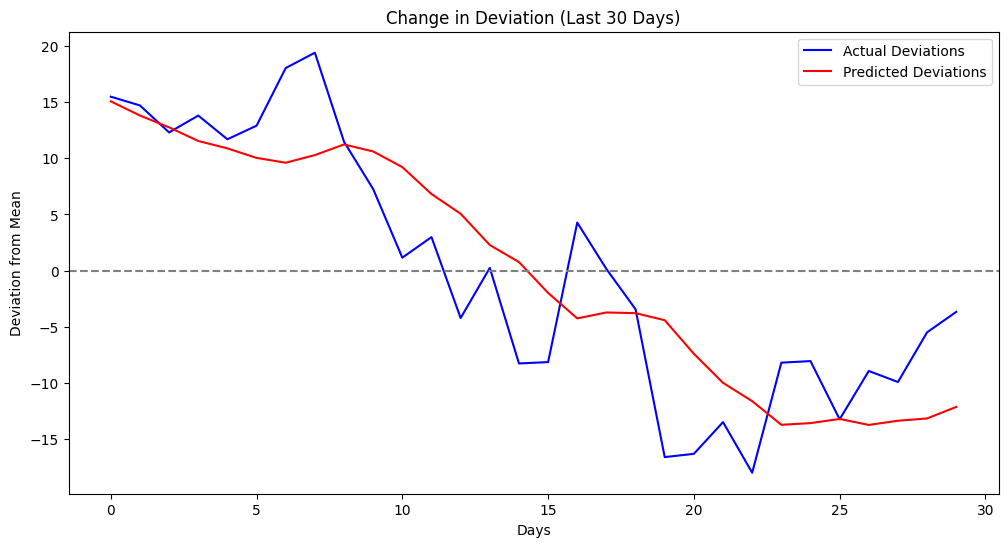

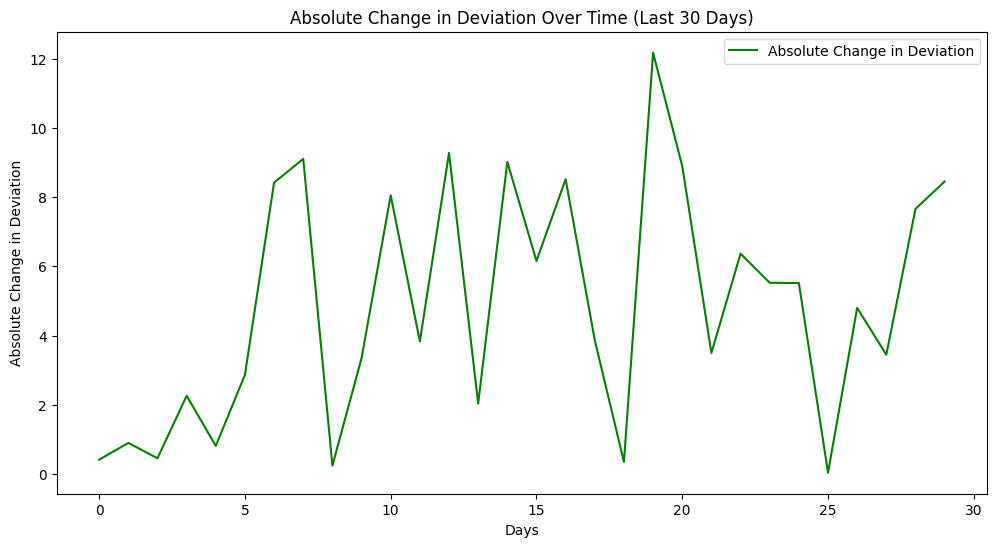

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code for model training, data preprocessing, etc.) ...

# Get predictions for the test set
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Focus on the last 30 days
num_days = 30
start_index = len(predicted_prices) - num_days

# Calculate deviations from the mean for actual and predicted prices
actual_deviations = true_prices[start_index:] - np.mean(true_prices[start_index:])
predicted_deviations = predicted_prices[start_index:] - np.mean(predicted_prices[start_index:])

# Calculate the change in deviation
change_in_deviation = np.mean(np.abs(actual_deviations - predicted_deviations))

# Print the change in deviation
print(f"Change in Deviation (Last 30 Days): {change_in_deviation:.2f}")

# Plot the deviations and change in deviation
plt.figure(figsize=(12, 6))
plt.plot(actual_deviations, label="Actual Deviations", color='blue')
plt.plot(predicted_deviations, label="Predicted Deviations", color='red')
plt.axhline(y=0, color='gray', linestyle='--')  # Add a horizontal line at y=0
plt.title('Change in Deviation (Last 30 Days)')
plt.xlabel('Days')
plt.ylabel('Deviation from Mean')
plt.legend()
plt.show()

# You can also plot the absolute change in deviation over time
plt.figure(figsize=(12, 6))
plt.plot(np.abs(actual_deviations - predicted_deviations), label="Absolute Change in Deviation", color='green')
plt.title('Absolute Change in Deviation Over Time (Last 30 Days)')
plt.xlabel('Days')
plt.ylabel('Absolute Change in Deviation')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Assuming 'df' is your DataFrame containing the stock data
correlation_matrix = df.corr()

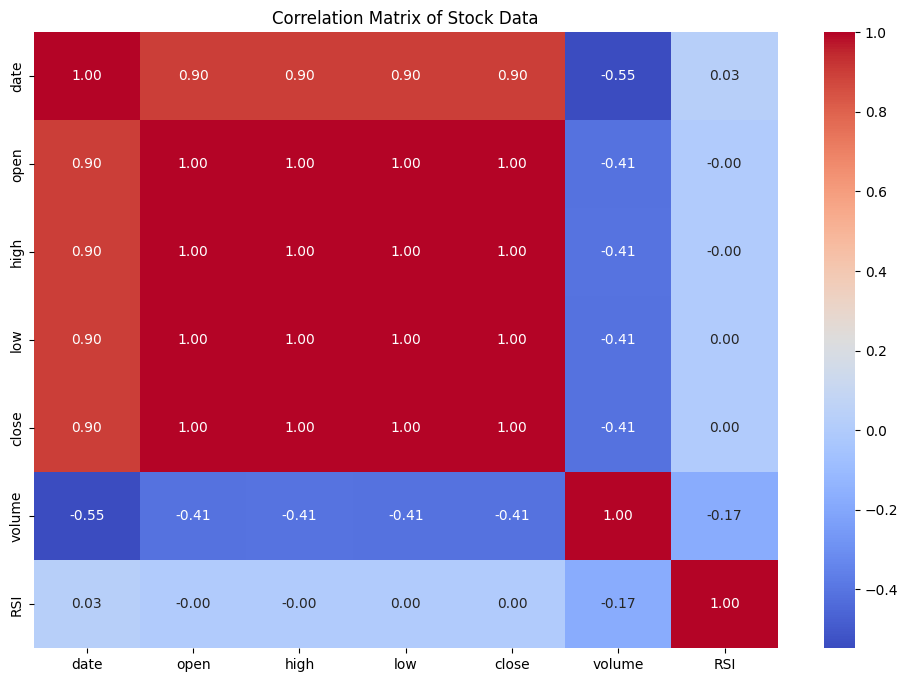

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Data')
plt.show()